# t-SNE K-Means 8 Clusters

1. Selected t-SNE as dimensional reduction algorithm with n=2 dimensions
1. Selected K-Means as the clustering algorithm with k=8
1. Create plot of Garamond with labels for each element

## Imports And Globals

In [5]:
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import plot_utils.plot_clusters as PLOT_CLUST
import sci_kit_learn_utils.clustering as CLUST

## Named Tuples
1. Font Selection
    1. Selected Font
    1. Font Variant Name
    1. Font Style
1. Plot Configuration
    1. Cluster Id
    1. Color
    1. Class Name

In [2]:
FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style'])

FONTS = [
    FontSelection('garamond', 'GARAMOND', 'Old Style'),
    FontSelection('baskerville', 'BASKERVILLE OLD FACE', 'Transitional'),
    FontSelection('bodoni', 'BODONI', 'Modern'),
    FontSelection('arial', 'ARIAL', 'Sans Serif')
]

### Prepare Data
1. Get Upper/Lower/Numeral ASCII Code object
1. Load raw font data from disk
    1. Contains multiple faces for font
    1. Contains italic faces for font
    1. Contains normal weight and bold weight font
    1. Select only normal and bold weight
1. Capture array of lables
1. Pack Dimensionally Reduced DataFrames into list

In [3]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()

lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
font_df = font_dict['GARAMOND']['df']

LABEL_AR = None

raw_dfs = list()

for i in range(font_dict['GARAMOND']['min_char_count']):
        t_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[i] for x in uln])
        
        if i==0:
            LABEL_AR = [chr(x) for x in t_df.m_label]
            
        t_df = t_df.drop(columns=['m_label'])
        t_df = t_df-t_df.mean(axis=0)
        
        tsne = TSNE(n_components=2, init='pca',random_state=0, method='exact')
        tsne_y = tsne.fit_transform(t_df)

        cluster_df = pd.DataFrame(tsne_y)
        cluster_df.columns = ['x', 'y']
        raw_dfs.append(cluster_df)

## Perform K-Means

1. Normal Weight

In [18]:
n_kmeans = KMeans(n_clusters=8, random_state=0).fit(raw_dfs[0])
# print(f'Labels {kmeans.labels_}')
# print(f'Centroids {kmeans.cluster_centers_}')

n_df = pd.DataFrame(
    [
        np.array(n_kmeans.labels_).transpose(),
        np.array(LABEL_AR).transpose(),
        raw_dfs[0].x.transpose(),
        raw_dfs[0].y.transpose()        
    ]
).transpose()

n_df.columns = ['c_label', 'm_label', 'x', 'y']

## Plot The Results

1. Normal Weight

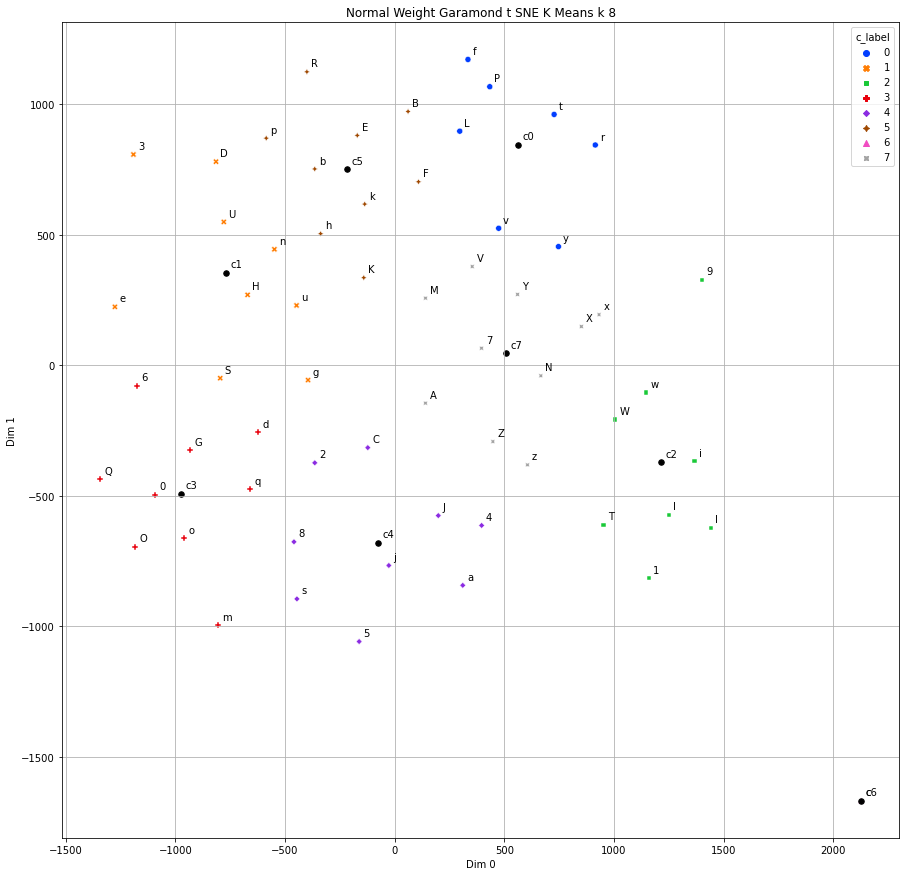

In [26]:
# Larger Labeled Plot
fig = plt.figure(figsize=(15,15))
sns.scatterplot(
    data=n_df,
    x='x',
    y='y',
    hue='c_label',  # chance to class to debug large plot color mapping
    style='c_label',
    palette='bright'
)

for i in range(raw_dfs[0].shape[0]):
    plt.text(
        x=n_df.x[i]+20,
        y=n_df.y[i]+20,
        s=n_df.m_label[i]
    )

plt.scatter(n_kmeans.cluster_centers_[:,0], n_kmeans.cluster_centers_[:,1], s=30, color='black')
for i in range(len(n_kmeans.cluster_centers_)):
    plt.text(
        x=n_kmeans.cluster_centers_[i,0]+20,
        y=n_kmeans.cluster_centers_[i,1]+20,
        s=f'c{i}'
    )

n_title = 'Normal Weight Garamond t SNE K Means k 8'

plt.title(n_title)
plt.xlabel('Dim 0')
plt.ylabel('Dim 1')
plt.grid()
plt.show()

pdf_filename = f'{n_title.replace(" ", "_")}.pdf'
fig.savefig(pdf_filename, bbox_inches='tight')

### List elements in each class

In [32]:
for i in range(8):
    mems = n_df.loc[df['c_label'] == i].m_label
    s = ','.join(mems)
    print(f'Class {i} : {s}')

Class 0 : f,r,t,v,y,L,P
Class 1 : e,g,n,u,D,H,S,U,3
Class 2 : i,l,w,I,T,W,1,9
Class 3 : d,m,o,q,G,O,Q,0,6
Class 4 : a,j,s,C,J,2,4,5,8
Class 5 : b,h,k,p,B,E,F,K,R
Class 6 : c
Class 7 : x,z,A,M,N,V,X,Y,Z,7


## Perform K-Means

1. Bold Weight

In [33]:
b_kmeans = KMeans(n_clusters=8, random_state=0).fit(raw_dfs[1])
b_df = pd.DataFrame(
    [
        np.array(b_kmeans.labels_).transpose(),
        np.array(LABEL_AR).transpose(),
        raw_dfs[1].x.transpose(),
        raw_dfs[1].y.transpose()        
    ]
).transpose()

b_df.columns = ['c_label', 'm_label', 'x', 'y']

## Plot Results

1. Bold Weight

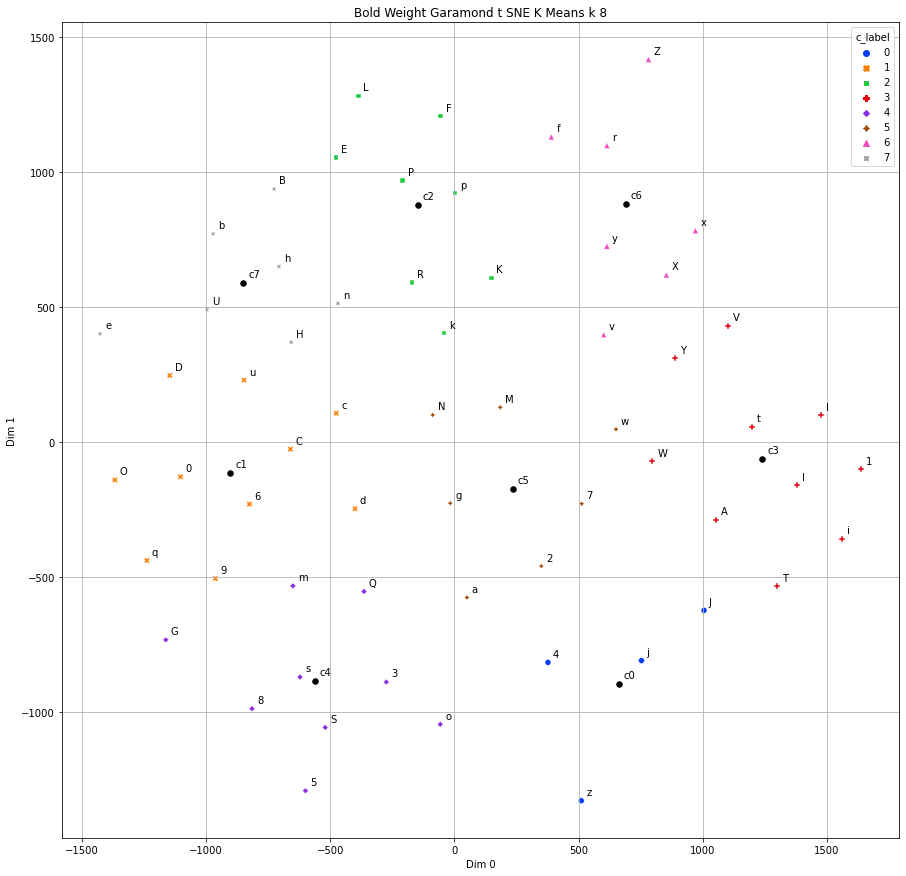

In [34]:
# Larger Labeled Plot
fig = plt.figure(figsize=(15,15))
sns.scatterplot(
    data=b_df,
    x='x',
    y='y',
    hue='c_label',  # chance to class to debug large plot color mapping
    style='c_label',
    palette='bright'
)

for i in range(raw_dfs[1].shape[0]):
    plt.text(
        x=b_df.x[i]+20,
        y=b_df.y[i]+20,
        s=b_df.m_label[i]
    )

plt.scatter(b_kmeans.cluster_centers_[:,0], b_kmeans.cluster_centers_[:,1], s=30, color='black')
for i in range(len(b_kmeans.cluster_centers_)):
    plt.text(
        x=b_kmeans.cluster_centers_[i,0]+20,
        y=b_kmeans.cluster_centers_[i,1]+20,
        s=f'c{i}'
    )

b_title = 'Bold Weight Garamond t SNE K Means k 8'

plt.title(b_title)
plt.xlabel('Dim 0')
plt.ylabel('Dim 1')
plt.grid()
plt.show()

pdf_filename = f'{b_title.replace(" ", "_")}.pdf'
fig.savefig(pdf_filename, bbox_inches='tight')

### List elements in each class

In [35]:
for i in range(8):
    mems = b_df.loc[df['c_label'] == i].m_label
    s = ','.join(mems)
    print(f'Class {i} : {s}')

Class 0 : f,r,t,v,y,L,P
Class 1 : e,g,n,u,D,H,S,U,3
Class 2 : i,l,w,I,T,W,1,9
Class 3 : d,m,o,q,G,O,Q,0,6
Class 4 : a,j,s,C,J,2,4,5,8
Class 5 : b,h,k,p,B,E,F,K,R
Class 6 : c
Class 7 : x,z,A,M,N,V,X,Y,Z,7
